In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from  datetime import datetime
import os
import nltk
from textblob import TextBlob
import networkx as nx
%matplotlib inline

import seaborn as sns
from IPython.display import display  
from ipywidgets import FloatProgress  
import time

import pprint as pp

In [2]:
file_info = "C:/Users/talha/Documents/DA/da_project/dataset2/file_info.csv"
file_df = pd.read_csv(file_info)

In [6]:
_dir = "C:/Users/talha/Documents/DA/da_project/"
email_sentiment_df = "email_sentiment_analysis_df_vader"
email_sentiment = pd.read_pickle(_dir+email_sentiment_df)
email_df = pd.read_csv(_dir+"dataset2/"+"email_info.csv")

### Read DFs

In [5]:
file_df = pd.read_pickle("file_df")
emp_df = pd.read_pickle("emp_df")
file_emp_df = pd.read_pickle("file_emp_df")
email_sentiment_df = pd.read_pickle("email_sentiment_df")

In [7]:
email_df.set_index('id', inplace=True)

In [8]:
email_sentiment_df=pd.DataFrame(email_sentiment)

In [9]:
email_sentiment_df=pd.merge(email_df, email_sentiment_df, how='left', left_index=True, right_index=True)

In [10]:
avg_emp_email_sent = email_sentiment_df.groupby('user')['content_y'].sum() \
        / email_sentiment_df.groupby('user')['content_y'].size()

In [11]:
avg_emp_email_sent=pd.DataFrame(avg_emp_email_sent)
# avg_emp_email_sent

In [97]:
# avg_emp_email_sent

In [15]:
email_sentiment_df.to_picklee("email_sentiment_df")

In [92]:
emp_df = pd.read_pickle("C:/Users/talha/Documents/DA/da_project/emp_info_last_access")

In [93]:
emp_df = pd.merge(emp_df, avg_emp_email_sent, how='inner', left_on='user_id', right_index=True)

In [105]:
emp_df.rename(columns={'content_y' : 'avg_email_sent'}, inplace=True)

In [106]:
emp_df.head()

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,...,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving,avg_email_sent
employee_name,,,,,,,,,,,,,,,,,,,,,
Calvin Edan Love,CEL0561,Calvin.Edan.Love@dtaa.com,ComputerProgrammer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,18,0,...,39,36,19,40,615,346,2011-05-16 18:00:00,2011-06-01,0,0.070658
Christine Reagan Deleon,CRD0624,Christine.Reagan.Deleon@dtaa.com,Salesman,1,5 - SalesAndMarketing,2 - Sales,3 - RegionalSales,Winter Veda Burks,3,1,...,22,17,39,32,50,50,2010-03-05 16:58:00,2010-03-01,0,0.017618
Jade Felicia Caldwell,JFC0557,Jade.Felicia.Caldwell@dtaa.com,SoftwareEngineer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,18,0,...,16,23,40,33,615,346,2011-05-16 17:47:00,2011-06-01,0,-0.000493
Aquila Stewart Dejesus,ASD0577,Aquila.Stewart.Dejesus@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,3 - AssemblyDept,Whilemina Pandora England,18,0,...,48,36,14,37,346,346,2011-05-16 18:29:00,2011-06-01,0,0.112476
Micah Abdul Rojas,MAR0955,Micah.Abdul.Rojas@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,6 - AssemblyDept,Sandra Beverly Diaz,15,1,...,44,23,44,25,302,302,2011-03-04 16:17:00,2011-03-01,0,0.140699


In [107]:
emp_df.to_pickle('emp_df')

In [34]:
file_df['ext'] = file_df['filename'].apply(lambda x : x.rsplit(".")[1])

In [38]:
file_df.to_pickle("file_df")

In [39]:
file_df = pd.read_pickle("file_df")

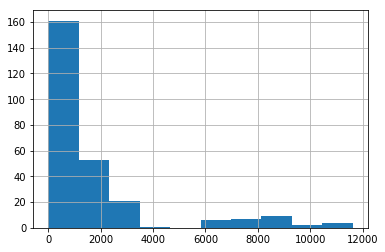

In [40]:
file_df.groupby('user').size().hist(a)

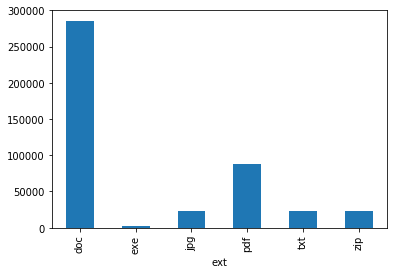

In [44]:
file_df.groupby('ext').size().plot(kind='bar')

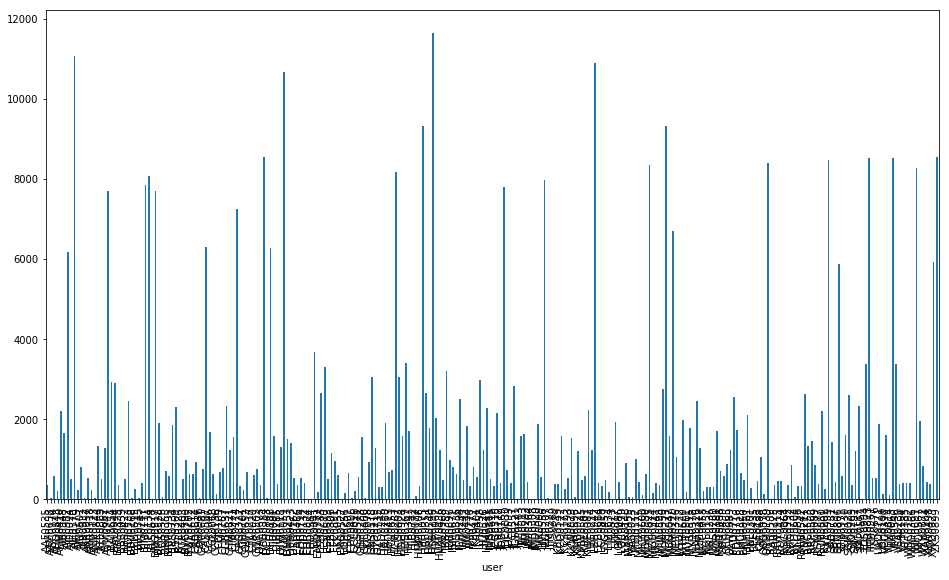

In [84]:
plt.figure(figsize=(16,9))
file_df.groupby('user').size().plot(kind='bar')

In [67]:
pd.set_option('display.max_colwidth', 1000)
file_df[file_df['ext']=='exe']['content'].str.contains("prince")
file_df[file_df['ext']=='exe']['content'].str.contains("prince prince")

file_df[(file_df['content'].str.contains('prince prince')) & (file_df['ext']=='exe')]

,id,date,user,pc,filename,content,ext
44,{L6Z8-K0DX54PN-2862BTHW},01/02/2010 09:49:30,HSB0196,PC-8001,RJGC8XX5.exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 prince prince prince ahmose prince prince prince prince ahmose ahmose ahmose prince prince prince ahmose prince prince prince prince prince prince prince prince ahmose prince prince prince prince prince prince ahmose prince prince prince prince prince ahmose prince prince prince prince prince prince ahmose prince prince prince prince prince ankh prince prince prince prince prince ahmose prince prince prince prince ahmose prince ankh prince prince,exe
8646,{H8Z6-P7JJ18KZ-7411KAQM},01/11/2010 15:53:59,LCB0664,PC-3196,J0SP8XGN.exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 southern beginning hill hawks shortly trade story or earliest figure divided strained record some great part were historical in described date biased survived appended saxon according succession was him continued according hold number inscribed last attacked 840s household was can prince prince prince prince prince ankh prince prince prince prince prince prince prince prince prince ankh,exe
10312,{E4U7-V7GP49KS-7569BYRP},01/13/2010 07:59:54,DIW0118,PC-0174,4EV4HS3O.exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 earlier reaching associated 20th involving jim spring time zero country training fact since 1999 provide down genre school 46 addition stations effects king electric 533 key meetings 23rd rights partner men onwards seen considered weak next bore know waitress submitted bronx change this head below 7 prince prince ahmose ahmose opening along reclaim,exe
15257,{P2Z0-P6YV39RH-1744AYYL},01/18/2010 10:53:57,RHL0992,PC-9040,J9FUTE8S.exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 prince prince prince prince prince prince prince prince prince prince ahmose prince prince prince prince ahmose prince prince prince prince prince prince prince prince ahmose prince ahmose prince ankh prince prince prince prince prince prince prince prince ankh ankh,exe
15392,{J0V7-Y4IO72LJ-7756AHRE},01/18/2010 12:00:11,VIA0063,PC-2684,FGF5OX8B.exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 1836 finished crunch neighborhoods financial action culture points 16 apparatus pen look neither 1984 life noted pacific six caught nothing described ankh prince prince ahmose railroad telling,exe
21702,{N8J5-C5WI74NZ-3703SWOK},01/23/2010 16:44:17,BRS0734,PC-4785,CGICLX44.exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 prince prince prince prince prince prince prince ahmose prince prince prince prince prince prince prince prince prince prince prince ankh prince prince ankh prince prince prince ankh prince prince prince prince prince ahmose ahmose prince prince prince ankh prince ankh prince ankh prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince,exe
21860,{H3N8-J3EK35KA-5154JFNK},01/24/2010 17:42:54,HSB0196,PC-8001,GQL403V5.exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 prince prince prince prince prince prince prince ankh ahmose prince prince ankh ahmose prince ahmose prince prince ankh ankh prince prince prince prince prince prince prince prince,exe
31377,{M1R5-J0DY38KG-1852UGYT},02/02/2010 17:51:17,HSB0196,PC-8001,YEKRIDT2.exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 prince ahmose ankh prince ahmose ahmose prince prince prince prince prince prince ankh prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince ankh ankh prince prince prince prince prince prince prince prince prince prince prince prince ahmose,exe
33025,{E9Y3-H8IQ50HM-8488MIEZ},02/04/2010 10:40:17,HSB0196,PC-8001,V9WNB3UM.exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00

In [108]:
pd.set_option('display.max_colwidth', 30)
emp_df[emp_df['user_id'] == 'HSB0196']

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,...,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving,avg_email_sent
employee_name,,,,,,,,,,,,,,,,,,,,,
Hadley Sonya Bowen,HSB0196,Hadley.Sonya.Bowen@dtaa.com,PurchasingClerk,1,6 - PurchasingAndContracts,1 - Purchasing,NaN,August Armando Evans,18,0,...,13,43,30,33,494,494,2011-05-16 18:06:00,2011-06-01,0,0.003294


In [204]:
# pd.set_option('display.max_colwidth', 100)
# email_df[email_df['content'].str.contains('fired')]['content']

In [205]:
# file_df.head()

In [141]:
file_sentiment = pd.read_pickle("./dataset2/file_info_vader_sentiment_analysis_df")

In [146]:
file_sentiment = pd.DataFrame(file_sentiment)

In [150]:
file_df = pd.merge(file_df, file_sentiment, how='inner', left_on='id', right_index=True)

In [152]:
file_df.set_index('id', inplace=True)

In [158]:
file_df.rename(columns={'content_x' : 'content', 'content_y':'sentiment'}, inplace=True)

In [159]:
file_df.head()

,date,user,pc,filename,content,ext,sentiment
id,,,,,,,
{L9G8-J9QE34VM-2834VDPB},01/02/2010 07:23:14,MOH0273,PC-6699,EYPC9Y08.doc,D0-CF-11-E0-A1-B1-1A-E1 du...,doc,0.2263
{H0W6-L4FG38XG-9897XTEN},01/02/2010 07:26:19,MOH0273,PC-6699,N3LTSU3O.pdf,25-50-44-46-2D carpenters ...,pdf,-0.3400
{M3Z0-O2KK89OX-5716MBIM},01/02/2010 08:12:03,HPH0075,PC-2417,D3D3WC9W.doc,D0-CF-11-E0-A1-B1-1A-E1 un...,doc,0.7964
{E1I4-S4QS61TG-3652YHKR},01/02/2010 08:17:00,HPH0075,PC-2417,QCSW62YS.doc,D0-CF-11-E0-A1-B1-1A-E1 be...,doc,-0.0516
{D4R7-E7JL45UX-0067XALT},01/02/2010 08:24:57,HSB0196,PC-8001,AU75JV6U.jpg,FF-D8,jpg,0.0000


In [201]:
file_df['date']=pd.to_datetime(file_df['date'])

In [203]:
file_df.to_pickle("file_df")

In [4]:
file_df.reset_index(inplace=True)

In [5]:
file_emp_df = pd.merge(file_df, emp_df, how='inner', left_on='user', right_on='user_id')
file_emp_df.set_index('id', inplace=True)
file_emp_df.head()

,date,user,pc,filename,content,ext,sentiment,user_id,email,role,...,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving,avg_email_sent
id,,,,,,,,,,,,,,,,,,,,,
{L9G8-J9QE34VM-2834VDPB},2010-01-02 07:23:14,MOH0273,PC-6699,EYPC9Y08.doc,D0-CF-11-E0-A1-B1-1A-E1 during difficulty over...,doc,0.2263,MOH0273,Macaulay.Otto.Hopkins@dtaa.com,HardwareEngineer,...,40,47,50,26,401,401,2011-05-16 17:15:00,2011-06-01,0,0.027658
{H0W6-L4FG38XG-9897XTEN},2010-01-02 07:26:19,MOH0273,PC-6699,N3LTSU3O.pdf,25-50-44-46-2D carpenters 25 landed strait dis...,pdf,-0.3400,MOH0273,Macaulay.Otto.Hopkins@dtaa.com,HardwareEngineer,...,40,47,50,26,401,401,2011-05-16 17:15:00,2011-06-01,0,0.027658
{L4I6-F0BS91WB-4633BBVN},2010-01-02 08:28:08,MOH0273,PC-6699,JS09VZOJ.doc,D0-CF-11-E0-A1-B1-1A-E1 yet chamberlain own co...,doc,-0.5688,MOH0273,Macaulay.Otto.Hopkins@dtaa.com,HardwareEngineer,...,40,47,50,26,401,401,2011-05-16 17:15:00,2011-06-01,0,0.027658
{L9N3-K0NQ00BL-3339RWUX},2010-01-02 08:28:24,MOH0273,PC-6699,LX0I6B1U.pdf,25-50-44-46-2D found british conflict close th...,pdf,-0.3506,MOH0273,Macaulay.Otto.Hopkins@dtaa.com,HardwareEngineer,...,40,47,50,26,401,401,2011-05-16 17:15:00,2011-06-01,0,0.027658
{M8V0-V4CQ99OO-0137UYUF},2010-01-02 09:14:38,MOH0273,PC-6699,TMF79YY1.doc,D0-CF-11-E0-A1-B1-1A-E1 hastily apparently tho...,doc,-0.2263,MOH0273,Macaulay.Otto.Hopkins@dtaa.com,HardwareEngineer,...,40,47,50,26,401,401,2011-05-16 17:15:00,2011-06-01,0,0.027658


In [6]:
file_emp_df.to_pickle("file_emp_df")

In [33]:
disgruntled_emp_file_info = file_emp_df[(file_emp_df['role']=='ITAdmin') & (file_emp_df['left']==1)]
disgruntled_emp_file_info_last_month = disgruntled_emp_file_info[(disgruntled_emp_file_info['date'].dt.year == disgruntled_emp_file_info['last_empl_month'].dt.year) & \
                      (disgruntled_emp_file_info['date'].dt.month \
                       == disgruntled_emp_file_info['last_empl_month'].dt.month)]

In [41]:
# disgruntled_emp_file_info_last_month[disgruntled_emp_file_info_last_month['role'] == 'ITAdmin']

In [34]:
pd.set_option('display.max_colwidth', 1000)
disgruntled_emp_file_info_last_month[disgruntled_emp_file_info_last_month['content'].str.contains("keylogging")][['user_id','date','last_empl_month','ext','content']]

,user_id,date,last_empl_month,ext,content
id,,,,,
{V8U7-S1VH94XJ-9439FHZH},GTD0219,2010-06-17 15:14:29,2010-06-01,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 protect keylogging recommend covert undetectable keyboard surveillance username activity program download pc password pc gui effective pc monitor captured advanced pc everything malware trial monitor keyboard easy hidden everything effective protect pc monitor pc surveillance easy keylogging protect everything easy stealth keyboard download easy program captured effective illegal
{Y8V1-M0YK81DK-8272ZWUF},MPM0220,2010-11-04 15:19:09,2010-11-01,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 file keylogging keyboard keylogging keylogging covert protect surveillance username easy undetectable useful surveillance free hidden username easy monitor keyboard surveillance undetectable effective free download everything advanced download secure free effective keyboard download activity protect keyboard pc captured malware
{E5M5-D6KI89WL-2909ZPOD},CSC0217,2010-06-10 15:20:36,2010-06-01,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 stealth surveillance hidden keyboard hidden protect download file protect secure password download everything captured file keylogging monitor malware covert download email password advanced keyboard free malware captured easy activity advanced advanced email monitor download captured gui pc everything program covert recommend
{E1M3-R7DK26GA-8518UDJS},JGT0221,2010-07-15 15:20:57,2010-07-01,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 keylogging secure hidden malware keylogging covert gui surveillance password activity username download undetectable download hidden activity everything undetectable file stealth password surveillance advanced download program free protect easy undetectable recommend password password username username password protect illegal covert program keylogging keylogging
{Y9S9-O8JY62WK-5122FYHK},JTM0223,2010-07-22 15:11:09,2010-07-01,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 hidden easy username effective program password illegal download file recommend protect password password protect download email surveillance captured advanced surveillance easy effective username captured advanced file illegal undetectable surveillance stealth easy username surveillance covert keylogging free username keylogging illegal file recommend password recommend keylogging monitor covert keyboard everything keyboard recommend program program keyboard program monitor illegal covert trial captured effective illegal gui easy secure download download
{K2J1-I4QF06RY-3532YBGN},BBS0039,2010-08-12 14:54:16,2010-08-01,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 effective easy username secure trial captured protect download secure surveillance recommend keylogging activity recommend program keyboard secure download keylogging email captured monitor easy password covert malware program keylogging surveillance download hidden undetectable stealth keyboard program program stealth keyboard stealth monitor useful file gui pc username email monitor useful file
{G8F9-T3DN98MC-1163PAKR},MSO0222,2010-12-09 15:23:48,2010-12-01,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 file undetectable username malware everything pc free stealth monitor free monitor captured free covert easy file username surveillance covert pc pc file download keylogging keyboard surveillance covert free free gui easy keylogging email stealth email hidden effective keylogging password monitor malware stealth surveillance advanced username easy hidden secure captured gui everything pc
{Y1C2-E8OP55AB-3637STMG},JLM0364,2011-04-28 16:06:52,2011-04-01,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 easy username free mo

In [40]:
file_emp_df[(file_emp_df['content'].str.contains("keylogging")) & (file_emp_df['ext']=='exe')][['user', 'left', 'ext', 'content']]

,user,left,ext,content
id,,,,
{A5G9-U0DS24RQ-5724QSCY},BSS0369,1,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 download activity file covert free surveillance keyboard program username monitor download username password captured easy free malware password pc surveillance hidden activity password effective easy recommend stealth undetectable email effective pc hidden keylogging protect useful surveillance useful keylogging gui easy
{V8U7-S1VH94XJ-9439FHZH},GTD0219,1,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 protect keylogging recommend covert undetectable keyboard surveillance username activity program download pc password pc gui effective pc monitor captured advanced pc everything malware trial monitor keyboard easy hidden everything effective protect pc monitor pc surveillance easy keylogging protect everything easy stealth keyboard download easy program captured effective illegal
{Y8V1-M0YK81DK-8272ZWUF},MPM0220,1,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 file keylogging keyboard keylogging keylogging covert protect surveillance username easy undetectable useful surveillance free hidden username easy monitor keyboard surveillance undetectable effective free download everything advanced download secure free effective keyboard download activity protect keyboard pc captured malware
{E5M5-D6KI89WL-2909ZPOD},CSC0217,1,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 stealth surveillance hidden keyboard hidden protect download file protect secure password download everything captured file keylogging monitor malware covert download email password advanced keyboard free malware captured easy activity advanced advanced email monitor download captured gui pc everything program covert recommend
{E1M3-R7DK26GA-8518UDJS},JGT0221,1,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 keylogging secure hidden malware keylogging covert gui surveillance password activity username download undetectable download hidden activity everything undetectable file stealth password surveillance advanced download program free protect easy undetectable recommend password password username username password protect illegal covert program keylogging keylogging
{Y9S9-O8JY62WK-5122FYHK},JTM0223,1,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 hidden easy username effective program password illegal download file recommend protect password password protect download email surveillance captured advanced surveillance easy effective username captured advanced file illegal undetectable surveillance stealth easy username surveillance covert keylogging free username keylogging illegal file recommend password recommend keylogging monitor covert keyboard everything keyboard recommend program program keyboard program monitor illegal covert trial captured effective illegal gui easy secure download download
{K2J1-I4QF06RY-3532YBGN},BBS0039,1,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 effective easy username secure trial captured protect download secure surveillance recommend keylogging activity recommend program keyboard secure download keylogging email captured monitor easy password covert malware program keylogging surveillance download hidden undetectable stealth keyboard program program stealth keyboard stealth monitor useful file gui pc username email monitor useful file
{G8F9-T3DN98MC-1163PAKR},MSO0222,1,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 file undetectable username malware everything pc free stealth monitor free monitor captured free covert easy file username surveillance covert pc pc file download keylogging keyboard surveillance covert free free gui easy keylogging email stealth email hidden effective keylogging password monitor malware stealth surveillance advanced user

In [35]:
file_emp_df[file_emp_df['ext']=='exe'].groupby(['role', 'left'])['role']

In [ ]:
file_emp_df[file_emp_df['user'] == 'SMY0792']

In [195]:
pd.set_option('display.max_colwidth', 100)
disgruntled_emp_file_info[disgruntled_emp_file_info['content'].str.contains('security')]['content']

id
{A9U6-V8AB38PQ-5888AYZP}    D0-CF-11-E0-A1-B1-1A-E1 showed some intended 1969 subject radius approach fusion fields piece ma...
{J9U8-D9FZ61BN-9066FVYM}    30-30-53-42 itself per soon creation happened 110 accepted limestone pemex student 16 lower plea...
{X9S8-E5ZY66LE-4414CJOK}    D0-CF-11-E0-A1-B1-1A-E1 shehri getting wife 0600 john hear investigators rushed hit months part ...
{J0Z7-U6HK44LH-2812NPLH}    D0-CF-11-E0-A1-B1-1A-E1 lead 20 number arcseconds automated outbursts confirmation number normal...
{X4U3-P9BX09UG-3096EEUG}    D0-CF-11-E0-A1-B1-1A-E1 part weaving 1837 married carried dependent january cut 1832 security he...
{W1J5-G4AA20NE-6830BKQD}    D0-CF-11-E0-A1-B1-1A-E1 concentrates per conclusion range electron line vocal judge kept include...
{W4P1-X7GO64RA-1127GGVR}    D0-CF-11-E0-A1-B1-1A-E1 good dump 1 yet featured explored long mothers ultimately if representat...
{K5K7-Q4ND55IM-3694NTHJ}    D0-CF-11-E0-A1-B1-1A-E1 provide enough newspapers dramas minority simple 

# Did anyone access/connected after leaving?

In [13]:
file_emp_df[(file_emp_df['date'].dt.month > file_emp_df['last_empl_month'].dt.month) &
            (file_emp_df['date'].dt.year > file_emp_df['last_empl_month'].dt.year)]

,date,user,pc,filename,content,ext,sentiment,user_id,email,role,...,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving,avg_email_sent
id,,,,,,,,,,,,,,,,,,,,,


### Well, No.

### Okay, what did they do in their last month?

In [15]:
last_month_files_accessed = file_emp_df[(file_emp_df['date'].dt.month >= file_emp_df['last_empl_month'].dt.month) &
                                    (file_emp_df['date'].dt.year >= file_emp_df['last_empl_month'].dt.year)]

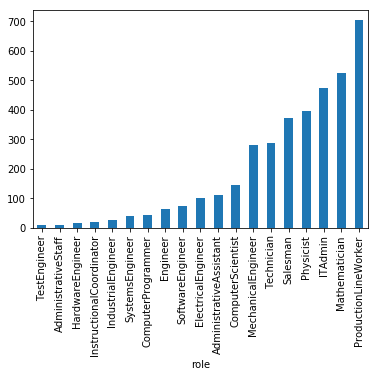

In [22]:
last_month_files_accessed.groupby('role').size().sort_values().plot(kind='bar')

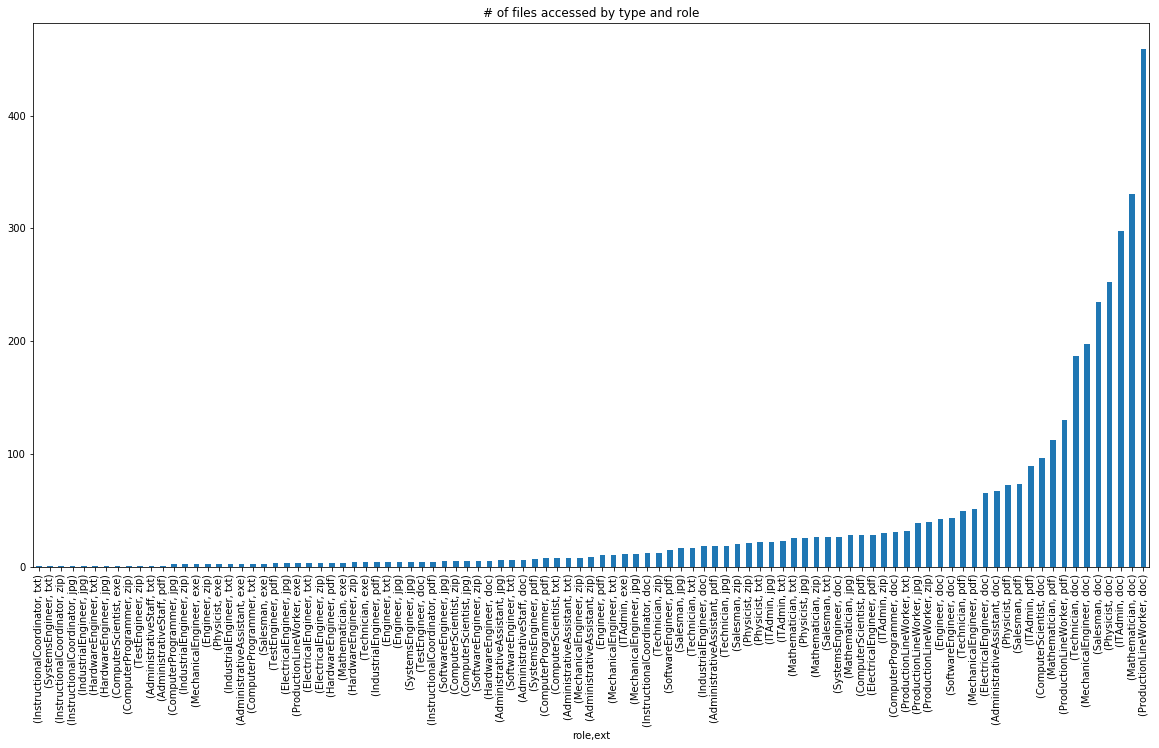

In [29]:
plt.figure(figsize=(20,10))
plt.xlabel("Number of files accessed")
plt.title("# of files accessed by type and role")
last_month_files_accessed.groupby(['role', 'ext']).size().sort_values().plot(kind='bar')

##### Most files accessed are doc and pdf files. That looks innocous.

### Just look @ zip and exec files. That's of main interest....

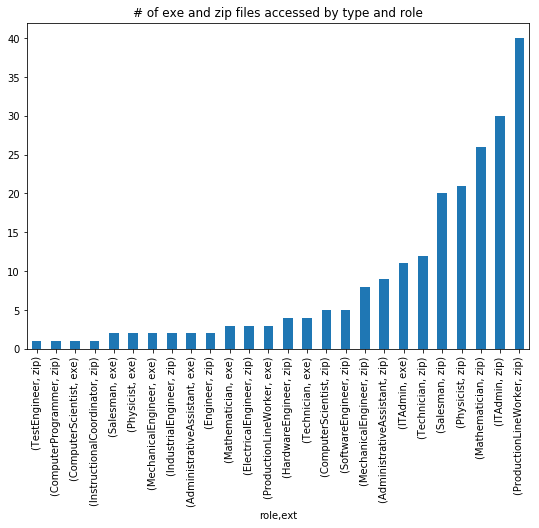

In [31]:
plt.figure(figsize=(9,6))
plt.xlabel("Number of files accessed")
plt.title("# of exe and zip files accessed by type and role")
last_month_files_accessed[last_month_files_accessed['ext'].isin(['exe', 'zip'])].groupby(['role', 'ext']).size().sort_values().plot(kind='bar')

# Analysis of employee using alias emails

In [28]:
# emp_df.head()

In [22]:
tmp_emp_df = emp_df.reset_index()

In [26]:
tmp_emp_df = tmp_emp_df[['employee_name', 'user_id', 'email', 'role', 'team', 'functional_unit', 'department', 'supervisor', 'left', 'avg_email_sent', 'last_empl_month']]

In [29]:
email_emp_df = pd.merge(email_sentiment_df, tmp_emp_df, how='inner', left_on='user', right_on='user_id')

In [30]:
email_emp_df.to_pickle("email_emp_df")

In [ ]:
using_aliases = ['AAF0791']

In [33]:
tmp=email_emp_df.groupby(['user', 'employee_name', 'from']).size()

In [52]:
alias = []
not_alias = False
for i, v in tmp.iteritems():
    user_id = i[0]
    name = i[1]
    email = i[2]
    name_parts = name.split()
    for p in name_parts:
        if p in email:
            not_alias = True
    if not not_alias:
        alias.append((user_id, name, email))
    not_alias = False

In [55]:
for _ in alias:
    print (_)

('AAF0791', 'Aladdin Abraham Foley', 'Giselle.Velasquez@charter.net')
('AAN0823', 'Anthony Aidan Nixon', 'AAN2553@aol.com')
('ABC0253', 'Alec Boris Chase', 'ABC251@cox.net')
('ABH0663', 'Alan Benjamin Holder', 'ABH8117@optonline.net')
('ACC0042', 'Alfonso Colin Cooley', 'ACC9624@juno.com')
('ADC0391', 'Axel Donovan Compton', 'ADC8783@charter.net')
('AHC0142', 'Azalia Halee Cantu', 'AHC8@aol.com')
('AHD0848', 'Aladdin Hu Day', 'EIF989@gmail.com')
('AHD0848', 'Aladdin Hu Day', 'FRH7817@comcast.net')
('AHD0848', 'Aladdin Hu Day', 'Giselle_C_Velasquez@sbcglobal.net')
('AHD0848', 'Aladdin Hu Day', 'LNM6@bellsouth.net')
('AHD0848', 'Aladdin Hu Day', 'Mary_Becker@juno.com')
('AHD0848', 'Aladdin Hu Day', 'Paul-Adrien_Schwartz@bellsouth.net')
('AHG0634', 'Amir Hayden Gray', 'AHG7267@verizon.net')
('AIH0675', 'Aline Iris Hurst', 'Giselle_Velasquez@gmail.com')
('AIM0627', 'Adam Ishmael Mcdaniel', 'AIM7@gmail.com')
('AJC0840', 'Anne Jane Carey', 'Buckner_Rinah@netzero.com')
('AJC0840', 'Anne Jane 

('TSM0927', 'Tana Sonya Moody', 'Buckner_Rinah@verizon.net')
('TSM0927', 'Tana Sonya Moody', 'CMS358@earthlink.net')
('TSM0927', 'Tana Sonya Moody', 'Cathleen_G_Justice@earthlink.net')
('TSM0927', 'Tana Sonya Moody', 'Chang-Max@netzero.com')
('TSM0927', 'Tana Sonya Moody', 'Drew.A.Gilliam@hotmail.com')
('TSM0927', 'Tana Sonya Moody', 'EML6882@hotmail.com')
('TSM0927', 'Tana Sonya Moody', 'Elliott-Cameron@gmail.com')
('TSM0927', 'Tana Sonya Moody', 'Estrada-Candace@netzero.com')
('TSM0927', 'Tana Sonya Moody', 'Ewing-Emerald@juno.com')
('TSM0927', 'Tana Sonya Moody', 'Franco-Ezekiel@yahoo.com')
('TSM0927', 'Tana Sonya Moody', 'Fritz.R.Holman@hotmail.com')
('TSM0927', 'Tana Sonya Moody', 'Gabriel_T_Trevino@aol.com')
('TSM0927', 'Tana Sonya Moody', 'Giles.A.Thompson@optonline.net')
('TSM0927', 'Tana Sonya Moody', 'Giselle.Velasquez@yahoo.com')
('TSM0927', 'Tana Sonya Moody', 'HDB586@juno.com')
('TSM0927', 'Tana Sonya Moody', 'HXF81@netzero.com')
('TSM0927', 'Tana Sonya Moody', 'Hahn-Chris

#### Some employees are using their initials as email address. So removing them (it could be argued that they're suspicious but there are a lot of other suspicious aliases. should focus on them)

In [77]:
final_aliases=[]
for a in alias:
    user=a[0]
    name=a[1]
    email=a[2]
    split_=name.split(' ')
    initial=""
    for _ in split_:
        initial += _[0]
    if initial not in email:
        final_aliases.append((user, name, email))

In [79]:
for _ in final_aliases:
    print (_)

('AAF0791', 'Aladdin Abraham Foley', 'Giselle.Velasquez@charter.net')
('AHD0848', 'Aladdin Hu Day', 'EIF989@gmail.com')
('AHD0848', 'Aladdin Hu Day', 'FRH7817@comcast.net')
('AHD0848', 'Aladdin Hu Day', 'Giselle_C_Velasquez@sbcglobal.net')
('AHD0848', 'Aladdin Hu Day', 'LNM6@bellsouth.net')
('AHD0848', 'Aladdin Hu Day', 'Mary_Becker@juno.com')
('AHD0848', 'Aladdin Hu Day', 'Paul-Adrien_Schwartz@bellsouth.net')
('AIH0675', 'Aline Iris Hurst', 'Giselle_Velasquez@gmail.com')
('AJC0840', 'Anne Jane Carey', 'Buckner_Rinah@netzero.com')
('AJC0840', 'Anne Jane Carey', 'Cathleen_Justice@aol.com')
('AJC0840', 'Anne Jane Carey', 'Chang-Max@cox.net')
('AJC0840', 'Anne Jane Carey', 'Ewing_Emerald@earthlink.net')
('AJC0840', 'Anne Jane Carey', 'FRH7347@bellsouth.net')
('AJC0840', 'Anne Jane Carey', 'Franco-Ezekiel@bellsouth.net')
('AJC0840', 'Anne Jane Carey', 'Giles.A.Thompson@netzero.com')
('AJC0840', 'Anne Jane Carey', 'Giselle.Velasquez@bellsouth.net')
('AJC0840', 'Anne Jane Carey', 'HDB3@gmail

In [80]:
alias_df=pd.DataFrame(final_aliases)

In [81]:
alias_df.rename(columns={0:'user_id', 1:'employee_name', 2:'suspicious_email_id'}, inplace=True)

In [83]:
alias_df.groupby(['user_id', 'employee_name']).size()

user_id  employee_name          
AAF0791  Aladdin Abraham Foley       1
AHD0848  Aladdin Hu Day              6
AIH0675  Aline Iris Hurst            1
AJC0840  Anne Jane Carey            27
ALH0402  Adena Lisandra Hardin       3
ARA0252  Alexander Rafael Arnold     3
ATP0662  Aurora Tatiana Payne       34
BMC0547  Britanni Marah Cash        16
CCM0855  Chanda Celeste Mosley      26
GCG0951  Grant Camden Gay           39
HVF0067  Hector Vance Foster        23
IIL0513  Illana Isabelle Lamb       57
ILJ0526  Idola Lana Jarvis           9
JCV0245  James Cain Vargas          20
JFC0757  Jolene Frances Carey       70
JJB0700  Julie Jaime Burns           2
JSH0330  Judith Shaeleigh Hayden    43
KCF0045  Kendall Ciaran Frank       35
LJJ0905  Lionel Jasper Johnston     29
LMF0980  Leonard Malachi Floyd       6
LRW0970  Lilah Renee Wagner          1
MJB0588  Mikayla Jaden Barron       34
MNS0224  Medge Nichole Sims         11
NAB0903  Noah Andrew Beck           57
PAD0773  Patience Audrey Dougla

### Save this dataframe

In [84]:
alias_df.to_pickle('alias_df')

# Now, topic analysis on file_df

In [ ]:
import pandas
import os
import numpy as np

from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models, similarities
from gensim.models import CoherenceModel, Phrases
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS
import time

In [164]:
# Read data
print ("Reading data...")

doc_set = file_df["content"][:100].tolist()

print ("Read data complete")

Reading data...
Read data complete


In [173]:
# Stop Words.
from itertools import combinations, permutations
tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(get_stop_words('en'))
spacy_stop = set(STOP_WORDS)
nltk_stop = set(stopwords.words('english'))
my_stop_words = set(['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'first', 'second', 'third',
                'many', 'however', 'since', 'either', 'although', 'much', 'also', 'another', 'became', 'become', 'usually', 
                    'also', 'c', 'along', 'made', 'still', 'known', 'took', 'less', 'around', 'though', 'part', 'gave',
                    'later', 'early', 'went', 'long', 'began', 'mid', 'set', 'late', 'wrote', 'given', 'day', 'away',
                    'able', 'way', 'met', 'come', 'etc', 'able', 'said', 'based', 'kept', 'left', 'came', 'led', 'old', 
                    'new', 'apart', 'named', 'agrees', 'received', 'left', 'found', 'begun', 'late', 'early',
                    'half', 'new', 'old', 'instead', 'despite', 'overall', 'b', 'including', 'f', 'eyes',
                     
                     'east', 'west', 'north', 'south', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 
                     'august', 'september', 'october', 'november', 'december', 'according', 
                     
                     'near', 'initial', 'ultimately', 'better', 'd0_e0' 
                    ])

comb = list(combinations(['a', 'b', 'c', 'd', 'e', 'f','0', '1', '2', '3', '4', '5', '6', '7','8', '9'],2))
all_perms = []
for c in comb:
    perms = list(permutations(c))
    for p in perms:
        all_perms.append("".join(p))

stop_words = en_stop.union(my_stop_words).union(nltk_stop).union(spacy_stop).union(all_perms)

print("Total Stop words: " + str(len(stop_words)))


Total Stop words: 691


In [180]:
# Topic analysis using LDA.
def topic_analysis(data, num_topics, iterations=200):
    """
    @param data list of all the documents
    @param num_topics number of topics to find from topic modeling
    """
    texts = [None] * len(doc_set)
    # loop through document list
    for ind, i in enumerate(doc_set):
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if i not in stop_words and not i.isdigit()]
        # add tokens to list
        #texts.append(stopped_tokens)
        texts[ind]=stopped_tokens
    
    bigram = Phrases(texts)
    texts = [bigram[line] for line in texts]
        
    # remove words that appear only once
    all_tokens = sum(texts, [])
    tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word) == 1)
    texts = [[word for word in text if word not in tokens_once] for text in texts]

    # turn our tokenized documents into a id <-> term dictionary
    dictionary = corpora.Dictionary(texts)
    # convert tokenized documents into a document-term matrix
    corpus = [dictionary.doc2bow(text) for text in texts]
    ldamodel = models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, 
                                        iterations=iterations, minimum_probability=0,
                                         passes=20) # , passes=20,  chunksize=10000
    return (ldamodel, dictionary, corpus, texts)


# Number of topics and iterations
iterations=100
num_topics = 15

# Doing Topic Analysis here.
print ("Starting topic analysis")
start_time = time.time()
print ("Start At: " + time.strftime("%H:%M:%S", time.gmtime(start_time)))

(ldamodel, dictionary, corpus, texts) = topic_analysis(doc_set, num_topics, iterations=iterations)

print ("LDA Model complete... " + time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time)))

ldatopics = ldamodel.show_topics(formatted=False)
ldatopics = [[word for word, prob in topic] for topicid, topic in ldatopics]

print ("Got ldatopics. Creating coherence model.. "  + time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time)))

# Create Coherence Model
coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary).get_coherence() # , window_size=10
print ("Coherence: " + str(coherence))

ldamodel.save("./file_info_lda_topic_model/lda_model_file_info.model")
print ("Model saved as: lda_model.model")

ldamodel.show_topics(formatted=False)

Starting topic analysis
Start At: 18:29:03


C:\Users\talha\Anaconda3\lib\site-packages\gensim\models\phrases.py:275: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if all(parameter in getargspec(scoring)[0] for parameter in scoring_parameters):
C:\Users\talha\Anaconda3\lib\site-packages\gensim\models\phrases.py:275: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if all(parameter in getargspec(scoring)[0] for parameter in scoring_parameters):
C:\Users\talha\Anaconda3\lib\site-packages\gensim\models\phrases.py:275: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if all(parameter in getargspec(scoring)[0] for parameter in scoring_parameters):
C:\Users\talha\Anaconda3\lib\site-packages\gensim\models\phrases.py:275: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if all(parameter in getar

LDA Model complete... 00:00:05
Got ldatopics. Creating coherence model.. 00:00:05
Coherence: 0.358600688769
Model saved as: lda_model.model


[(0,
  [('brought', 0.012528479415293134),
   ('time', 0.0095480991547468707),
   ('king', 0.0095371167445428388),
   ('developed', 0.00947865145293059),
   ('rest', 0.0090296509516470305),
   ('difficult', 0.0082520475417268042),
   ('asked', 0.0065631388237266776),
   ('released', 0.0065625969176017649),
   ('formation', 0.006562549216642408),
   ('history', 0.0065624574834780335)]),
 (1,
  [('waters', 0.013117664521139119),
   ('world', 0.010618765317823277),
   ('recently', 0.0080899359715275506),
   ('type', 0.0080881154900828249),
   ('senior', 0.0080871512906821371),
   ('class', 0.0080861483951685069),
   ('strait', 0.0080859023337693792),
   ('decision', 0.0080648504161133037),
   ('blow', 0.0080623154090409786),
   ('close', 0.0070430211090929942)]),
 (2,
  [('war', 0.010162825495222334),
   ('coast', 0.008226143183737742),
   ('efforts', 0.0082216864244200397),
   ('encountered', 0.0082073859297885996),
   ('moved', 0.0078513113314502125),
   ('maintained', 0.006302320966431

In [213]:
# import pyLDAvis.gensim
# import warnings
# warnings.filterwarnings(action='ignore', category=UserWarning, module='pyLDAvis') # to suppress warnings on windows.

# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
# pyLDAvis.display(vis)

In [ ]:

# To load the model later
#ldamodel_max_coherence =  models.LdaModel.load('ldamodel_max_coherence.model')

# Assign topics to emails:
# num_topics=10
# lda_corpus = [max(prob, key=lambda y:y[1])
#                     for prob in ldamodel[corpus] ]
# emails_LDA = [[] for i in range(num_topics)]
# for i, x in enumerate(lda_corpus):
#     emails_LDA[x[0]].append(doc_set[i])


In [156]:
# plt.figure(figsize=(20,20))
# file_emp_df.groupby(['role', 'ext']).size().plot.bar()

In [39]:
emp_df.head()

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,...,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving,avg_email_sent
employee_name,,,,,,,,,,,,,,,,,,,,,
Calvin Edan Love,CEL0561,Calvin.Edan.Love@dtaa.com,ComputerProgrammer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,18,0,...,39,36,19,40,615,346,2011-05-16 18:00:00,2011-06-01,0,0.070658
Christine Reagan Deleon,CRD0624,Christine.Reagan.Deleon@dtaa.com,Salesman,1,5 - SalesAndMarketing,2 - Sales,3 - RegionalSales,Winter Veda Burks,3,1,...,22,17,39,32,50,50,2010-03-05 16:58:00,2010-03-01,0,0.017618
Jade Felicia Caldwell,JFC0557,Jade.Felicia.Caldwell@dtaa.com,SoftwareEngineer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,18,0,...,16,23,40,33,615,346,2011-05-16 17:47:00,2011-06-01,0,-0.000493
Aquila Stewart Dejesus,ASD0577,Aquila.Stewart.Dejesus@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,3 - AssemblyDept,Whilemina Pandora England,18,0,...,48,36,14,37,346,346,2011-05-16 18:29:00,2011-06-01,0,0.112476
Micah Abdul Rojas,MAR0955,Micah.Abdul.Rojas@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,6 - AssemblyDept,Sandra Beverly Diaz,15,1,...,44,23,44,25,302,302,2011-03-04 16:17:00,2011-03-01,0,0.140699
